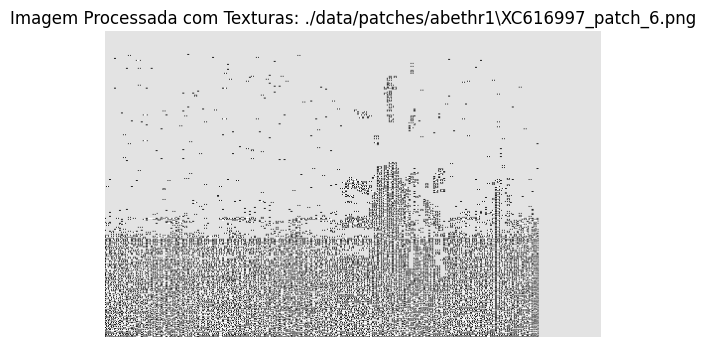

Processando ./data/patches/abethr1\XC616997_patch_6.png


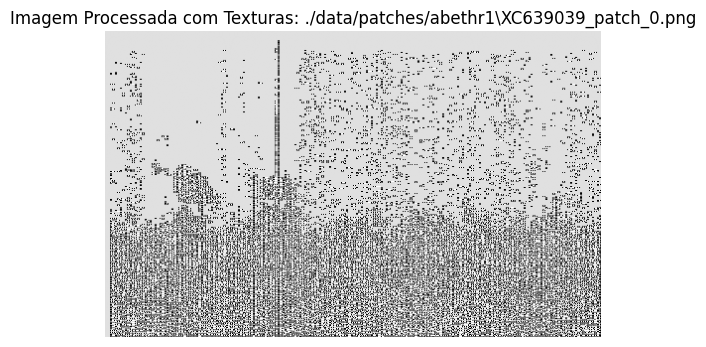

Processando ./data/patches/abethr1\XC639039_patch_0.png


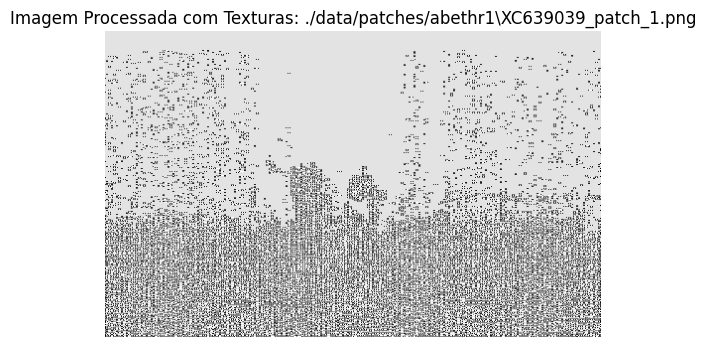

Processando ./data/patches/abethr1\XC639039_patch_1.png


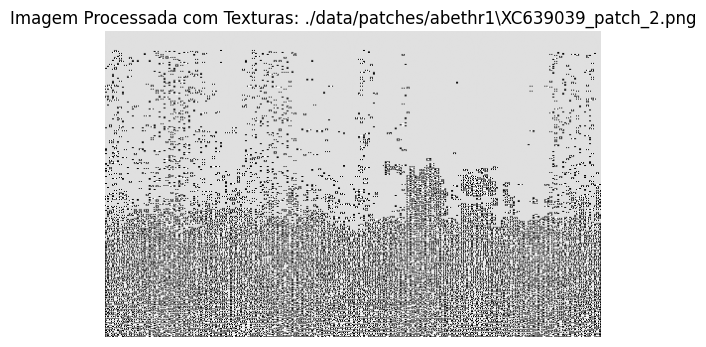

Processando ./data/patches/abethr1\XC639039_patch_2.png


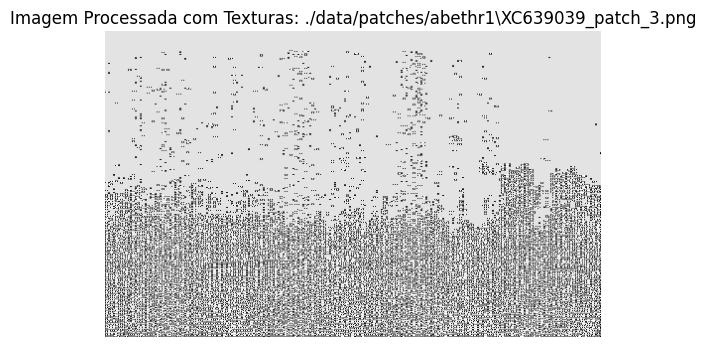

Processando ./data/patches/abethr1\XC639039_patch_3.png


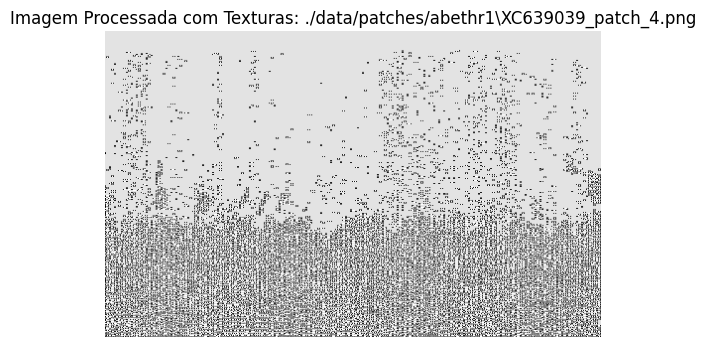

Processando ./data/patches/abethr1\XC639039_patch_4.png


KeyboardInterrupt: 

In [1]:
import os
import cv2
import pandas as pd
from skimage import feature
import numpy as np
import matplotlib.pyplot as plt

diretorio_imagens = './data/patches/'
diretorio_caracteristicas = './data/caracteristicas/'
arquivo_csv = './data/caracteristicas/LBP.csv'

# Se o diretório não existir, cria
if not os.path.exists(diretorio_caracteristicas):
    os.makedirs(diretorio_caracteristicas)

def calcular_LBP(imagem):
    lbp = feature.local_binary_pattern(imagem, 8, 1, method="uniform")
    return lbp

# Inicialize um DataFrame vazio para armazenar as características LBP
df = pd.DataFrame()

# Percorra todos os diretórios [key]
for key in os.listdir(diretorio_imagens):
    key_path = os.path.join(diretorio_imagens, key)
    
    # Percorra todas as imagens no diretório [key]
    for image_name in os.listdir(key_path):
        image_path = os.path.join(key_path, image_name)
        
        # Carregue a imagem
        imagem = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        
        # Calcule as características LBP (texturize a imagem)
        texturized_image = calcular_LBP(imagem)

        # Exiba a imagem com as texturas
        plt.imshow(texturized_image, cmap='gray')
        plt.title(f'Imagem Processada com Texturas: {image_path}')
        plt.axis('off')
        plt.show()

        print(f'Processando {image_path}')

# Defina os nomes das colunas no DataFrame
colunas = ['key', 'nome_arquivo'] + [f'LBP_{i}' for i in range(len(texturized_image.ravel()))]
df.columns = colunas

# Salve o DataFrame em um arquivo CSV
df.to_csv(arquivo_csv, index=False)
